# Data Analyst job application exercise
#### By Youssef de Madeen Amadou

In [ ]:
This is the Jupyter notebook of our analysis of PEI weather, sites and parks data.
The codes are written in Python 2.7.

In [3]:
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
sns.set() # to use Seaborn styles graphics
from mpl_toolkits.basemap import Basemap

## Data loading

In [4]:
sites  = pd.read_csv('./OD19_Historic_Sites.csv')
parks_coord  = pd.read_csv('./Provincial_Parks_Coordinates.csv')
parks_occup  = pd.read_csv('./OD20_Provincial_Parks_Campground_Occupancy_Data.csv')
w2013  = pd.read_csv('./weather/weather_2013.csv')
w2014  = pd.read_csv('./weather/weather_2014.csv')
w2015  = pd.read_csv('./weather/weather_2015.csv')

## Analysis of sites attendancy

We will look at the yearly visitors counts of all the sites

In [6]:
sites.head()

,Location,Year,Month,Visitors
0,Orwell,2013,1,157
1,Beaconsfield,2013,1,595
2,Eptek,2013,1,604
3,Acadian,2013,1,148
4,Elmira,2013,1,0


In [214]:
sites_visit = sites.pivot_table('Visitors', 'Year', 'Location',aggfunc='sum')
sites_visit

Location,Acadian,Basin Head,Beaconsfield,Elmira,Eptek,Green Park,Orwell
Year,,,,,,,
2013,5638,17458,14251,6565,16350,3648,7714
2014,6174,15284,11700,4889,10537,3793,8692
2015,6067,15420,11703,6235,12595,4012,7993


Here we see that all sites except Green Park, Acadian & Orwell have had a decrease in visitors traffic, from year 2013 to 2015. Beaconsfield and Eptek were the most hit in year 2014; later we will try to understand the reason for that.

## Analysis of parks attendancy

### Parks sites sold

In [119]:
parks_visit = parks_occup.pivot_table('SITES SOLD', 'YEAR','PROVINCIAL PARK NAME',aggfunc='sum')
parks_visit

PROVINCIAL PARK NAME,Brudenell River Provincial Park,Cabot Beach Provincial Park,Cedar Dunes Provincial Park,Jacques Cartier Provincial Park,Linkletter Provincial Park,Lord Selkirk Provincial Park,Mill River Provincial Park,Northumberland Provincial Park,Panmure Island Provincial Park,Red Point Provincial Park
YEAR,,,,,,,,,,
2013,4576.0,4684.0,3410.0,2715.0,4131.0,1551.0,2564.0,2270.0,1481.0,5565.0
2014,4561.0,4928.0,3031.0,2478.0,4204.0,NaN,2246.0,2298.0,1506.0,5587.0
2015,4928.0,5706.0,3237.0,3002.0,4549.0,NaN,2699.0,2579.0,1456.0,6309.0


Overall 2015 has been a better year in terms for parks sites sales, compared to 2014, which is a special year. We notice that attendance at Panmure Island Provincial Park have been stagneting over the recent years. This is conformed when we look at the percentage of occupancy (see next table).

### Parks occupancy percentage

In [12]:
tmp = parks_occup.groupby(['YEAR', 'PROVINCIAL PARK NAME'])[['SITES SOLD','SITES AVAILABLE']].aggregate('sum')
parks_occupancy = tmp.apply(lambda x: 100*x[0] / x[1],axis=1).astype(float).unstack()
parks_occupancy

PROVINCIAL PARK NAME,Brudenell River Provincial Park,Cabot Beach Provincial Park,Cedar Dunes Provincial Park,Jacques Cartier Provincial Park,Linkletter Provincial Park,Lord Selkirk Provincial Park,Mill River Provincial Park,Northumberland Provincial Park,Panmure Island Provincial Park,Red Point Provincial Park
YEAR,,,,,,,,,,
2013,35.0,25.0,48.0,35.0,38.0,20.0,26.0,39.0,34.0,46.0
2014,35.0,26.0,38.0,32.0,39.0,NaN,22.0,40.0,34.0,46.0
2015,40.0,30.0,40.0,39.0,42.0,NaN,29.0,45.0,33.0,52.0


## Analysis of visitors distribution between sites (average of all records)

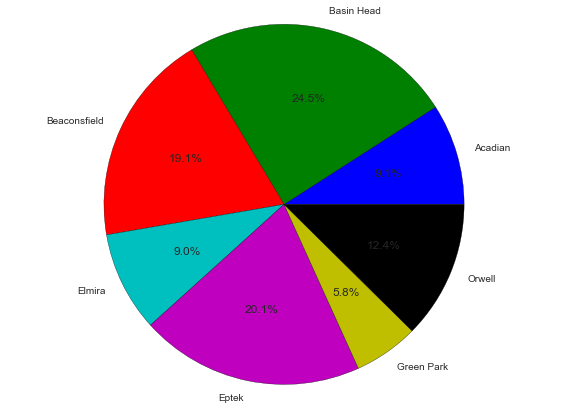

In [40]:
sites_visit_mean = sites_visit.apply(lambda x: np.mean(x),axis=0)
plt.pie(sites_visit_mean.tolist(),labels = sites_visit_mean.index.tolist(),autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

Basin Head, Beaconsflied and Eptek are clearly the most popular sites over the recent years.

## Analysis of visitors distribution between parks (average of all records)

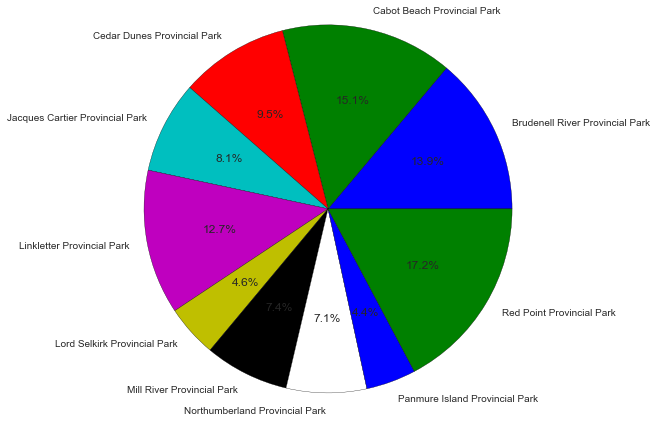

In [42]:
parks_visit_mean = parks_visit.apply(lambda x: np.mean(x),axis=0)
plt.pie(parks_visit_mean.tolist(),labels = parks_visit_mean.index.tolist(),autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

Panmure Island Provincial Park has recorded the lowest attendancy, with an average of 4.4% of visitors over the recent years. Next best is Lord Selkirk Provincial Park with 4.6% in average. We notably wee that 4 parks account for more than 50% of total average visitors, which are: Red Point, Linklater, Cabot Beach and Brudenell.

## Analysis of relation between the month average temperature and total visitors of sites

In [220]:
# combine weather data
w2013_2015 = w2013.append(w2014).append(w2015)

# total sites visitors per month
sites_visit_per_m = sites.groupby(['Year','Month']).aggregate('sum').reset_index(level=['Year','Month'])

# avg temp per month
avgtemp_per_m = w2013_2015[['Year','Month','Mean Temp (°C)']].groupby(['Year','Month']).aggregate('mean').reset_index(level=['Year','Month'])

# merge dataframes
merge = pd.merge(sites_visit_per_m,avgtemp_per_m,on=['Year','Month'])
merge.head()

,Year,Month,Visitors,Mean Temp (°C)
0,2013,1,1504,-7.624000
1,2013,2,985,-5.421053
2,2013,3,954,-1.677778
3,2013,4,1531,3.731818
4,2013,5,2292,10.580000


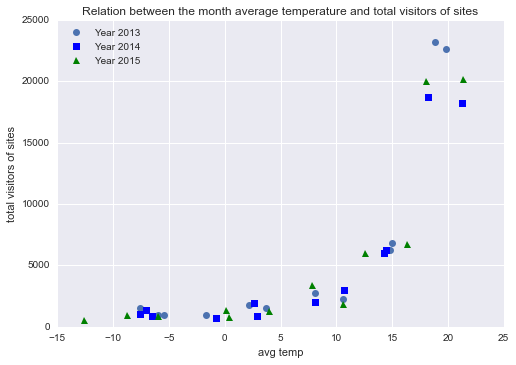

In [221]:
tmp = merge[['Year','Mean Temp (°C)','Visitors']]

# plot
fig, ax = plt.subplots()
ax.plot(tmp.query('Year == 2013',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2013',engine='python')[['Visitors']],'o', label='Year 2013')
ax.plot(tmp.query('Year == 2014',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2014',engine='python')[['Visitors']],'bs', label='Year 2014')
ax.plot(tmp.query('Year == 2015',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2015',engine='python')[['Visitors']],'g^', label='Year 2015')
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('avg temp')
plt.ylabel('total visitors of sites')
plt.title('Relation between the month average temperature and total visitors of sites')

As we would expect, sites attendancy is higher during the summer months.

## Analysis of relation between the month average temperature and total visitors of parks

In [225]:
parks_occup['% OCCUPANCY'] = parks_occup.apply(lambda x: 100*x[3] / x[4],axis=1).astype(float)
parks_visit_per_m = parks_occup.groupby(['YEAR','MONTH']).aggregate('mean').reset_index(level=['YEAR','MONTH'])[['YEAR','MONTH','SITES SOLD','% OCCUPANCY']]
parks_visit_per_m = parks_visit_per_m.rename(columns={'YEAR': 'Year', 'MONTH': 'Month'})

# merge dataframes
merge = pd.merge(parks_visit_per_m,avgtemp_per_m,on=['Year','Month'])

First we look at parks sites sales

In [227]:
tmp = merge[['Year','Mean Temp (°C)','SITES SOLD']]
tmp.head()

,Year,Mean Temp (°C),SITES SOLD
0,2013,10.580000,35.8
1,2013,15.007143,288.1
2,2013,19.813333,1337.1
3,2013,18.843333,1445.8
4,2013,14.793333,205.8


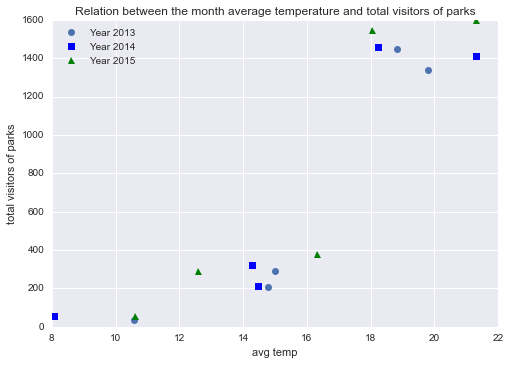

In [228]:
# plot
fig, ax = plt.subplots()
ax.plot(tmp.query('Year == 2013',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2013',engine='python')[['SITES SOLD']],'o', label='Year 2013')
ax.plot(tmp.query('Year == 2014',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2014',engine='python')[['SITES SOLD']],'bs', label='Year 2014')
ax.plot(tmp.query('Year == 2015',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2015',engine='python')[['SITES SOLD']],'g^', label='Year 2015')
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('avg temp')
plt.ylabel('total visitors of parks')
plt.title('Relation between the month average temperature and total visitors of parks')

We see the same kind of relationship with parks sites sales.

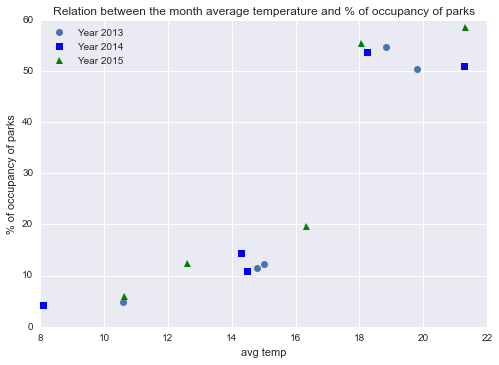

In [229]:
tmp = merge[['Year','Mean Temp (°C)','% OCCUPANCY']]
fig, ax = plt.subplots()
ax.plot(tmp.query('Year == 2013',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2013',engine='python')[['% OCCUPANCY']],'o', label='Year 2013')
ax.plot(tmp.query('Year == 2014',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2014',engine='python')[['% OCCUPANCY']],'bs', label='Year 2014')
ax.plot(tmp.query('Year == 2015',engine='python')[['Mean Temp (°C)']],tmp.query('Year == 2015',engine='python')[['% OCCUPANCY']],'g^', label='Year 2015')
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('avg temp')
plt.ylabel('% of occupancy of parks')
plt.title('Relation between the month average temperature and % of occupancy of parks')

## Which sites are most visited sites during the months with higher temperatures months with higher temperatures ?

In [ ]:
Here we look at the summer months (June to August)

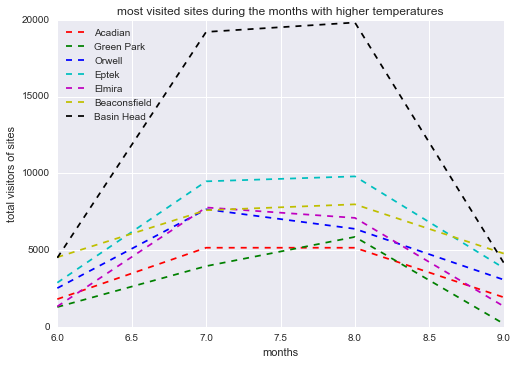

In [230]:
tmp = sites.query('Month in [6,7,8,9]',engine='python')[['Location', 'Month', 'Visitors']].groupby(
    ['Location','Month'])['Visitors'].aggregate('sum').reset_index(['Location','Month'])
fig, ax = plt.subplots()
ax.plot(tmp.query('Location == "Acadian"',engine='python')[['Month']],tmp.query('Location == "Acadian"',engine='python')[['Visitors']],'--r', label='Acadian')
ax.plot(tmp.query('Location == "Green Park"',engine='python')[['Month']],tmp.query('Location == "Green Park"',engine='python')[['Visitors']],'--g', label='Green Park')
ax.plot(tmp.query('Location == "Orwell"',engine='python')[['Month']],tmp.query('Location == "Orwell"',engine='python')[['Visitors']],'--b', label='Orwell')
ax.plot(tmp.query('Location == "Eptek"',engine='python')[['Month']],tmp.query('Location == "Eptek"',engine='python')[['Visitors']],'--c', label='Eptek')
ax.plot(tmp.query('Location == "Elmira"',engine='python')[['Month']],tmp.query('Location == "Elmira"',engine='python')[['Visitors']],'--m', label='Elmira')
ax.plot(tmp.query('Location == "Beaconsfield"',engine='python')[['Month']],tmp.query('Location == "Beaconsfield"',engine='python')[['Visitors']],'--y', label='Beaconsfield')
ax.plot(tmp.query('Location == "Basin Head"',engine='python')[['Month']],tmp.query('Location == "Basin Head"',engine='python')[['Visitors']],'--k', label='Basin Head')
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('months')
plt.ylabel('total visitors of sites')
plt.title('most visited sites during the months with higher temperatures')

The answer is: Basin Head, Eptek, Beaconsfield, which we already identified as the most popular overall. Interestingly, these 3 sites have also suffered the most from the decrease in attendancy observed in year 2014. In the next graphic, we compare the average monthly temparature of the 3 years. It appears that year summer temperatures in 2014 were generally lower by few degrees than 2015 and 2013. That difference in temperature could explain why sites and parks attendancy have decreased overall in 2014, and why Basin Head, Eptek, Beaconsfield, the most populat sites, have lost visitors that same year.

## Comparison of average monthly temperatures over the 3 years

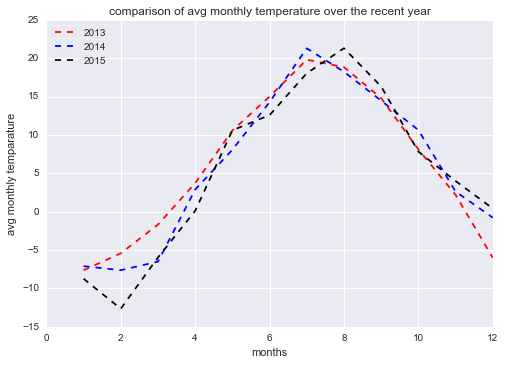

In [132]:
fig, ax = plt.subplots()
ax.plot(avgtemp_per_m.query('Year == 2013',engine='python')[['Month']],avgtemp_per_m.query('Year == 2013',engine='python')[['Mean Temp (°C)']],'--r', label='2013')
ax.plot(avgtemp_per_m.query('Year == 2014',engine='python')[['Month']],avgtemp_per_m.query('Year == 2014',engine='python')[['Mean Temp (°C)']],'--b', label='2014')
ax.plot(avgtemp_per_m.query('Year == 2015',engine='python')[['Month']],avgtemp_per_m.query('Year == 2015',engine='python')[['Mean Temp (°C)']],'--k', label='2015')
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('months')
plt.ylabel('avg monthly temparature')
plt.title('comparison of avg monthly temperature over the recent year')

## Which sites are most visited parks during the months with higher temperatures months with higher temperatures ?

We look at average occupancy percentage over the 3 years, with a focus on the summer months.

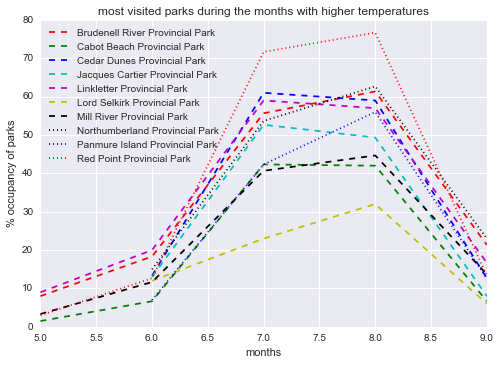

In [134]:
tmp = parks_occup.query('MONTH in [5,6,7,8,9]',engine='python')[['PROVINCIAL PARK NAME', 'MONTH', '% OCCUPANCY']].groupby(
    ['PROVINCIAL PARK NAME','MONTH'])['% OCCUPANCY'].aggregate('mean').reset_index(['PROVINCIAL PARK NAME','MONTH'])
    
tmp = tmp.rename(columns={'PROVINCIAL PARK NAME': 'PROVINCIAL_PARK_NAME'})
fig, ax = plt.subplots()
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Brudenell River Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Brudenell River Provincial Park"',engine='python')[['% OCCUPANCY']],'--r', label='Brudenell River Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Cabot Beach Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Cabot Beach Provincial Park"',engine='python')[['% OCCUPANCY']],'--g', label='Cabot Beach Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Cedar Dunes Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Cedar Dunes Provincial Park"',engine='python')[['% OCCUPANCY']],'--b', label='Cedar Dunes Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Jacques Cartier Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Jacques Cartier Provincial Park"',engine='python')[['% OCCUPANCY']],'--c', label='Jacques Cartier Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Linkletter Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Linkletter Provincial Park"',engine='python')[['% OCCUPANCY']],'--m', label='Linkletter Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Lord Selkirk Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Lord Selkirk Provincial Park"',engine='python')[['% OCCUPANCY']],'--y', label='Lord Selkirk Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Mill River Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Mill River Provincial Park"',engine='python')[['% OCCUPANCY']],'--k', label='Mill River Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Northumberland Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Northumberland Provincial Park"',engine='python')[['% OCCUPANCY']],':k', label='Northumberland Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Panmure Island Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Panmure Island Provincial Park"',engine='python')[['% OCCUPANCY']],':b', label='Panmure Island Provincial Park')
ax.plot(tmp.query('PROVINCIAL_PARK_NAME == "Red Point Provincial Park"',engine='python')[['MONTH']],tmp.query('PROVINCIAL_PARK_NAME == "Red Point Provincial Park"',engine='python')[['% OCCUPANCY']],':r', label='Red Point Provincial Park')
legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('months')
plt.ylabel('% occupancy of parks')
plt.title('most visited parks during the months with higher temperatures')

The answer is: Red Point, Northumberland and Brudenell.

## Map plot for the highest visitors of parks/sites

We look at average percentage of occupancy during the summer months (June to August). The map plot is made of circle representing the geographic location of parks on PEI map. We made the circle size proportional to the percentage of occupancy.

In [196]:
tmp = parks_occup.query('MONTH in [6,7,8,9]',engine='python')[['PROVINCIAL PARK NAME', '% OCCUPANCY']].groupby(
    ['PROVINCIAL PARK NAME'])['% OCCUPANCY'].aggregate('mean').reset_index(['PROVINCIAL PARK NAME'])
tmp = tmp.rename(columns={'PROVINCIAL PARK NAME': 'PROVINCIAL_PARK_NAME'})
parks_coord = parks_coord.rename(columns={'PROVINCIAL PARK NAME': 'PROVINCIAL_PARK_NAME'})

tmp2 = pd.merge(tmp,parks_coord,on=['PROVINCIAL_PARK_NAME'])

In [206]:
tmp2

,PROVINCIAL_PARK_NAME,% OCCUPANCY,LATITUDE,LONGITUDE
0,Brudenell River Provincial Park,39.166667,46.209126,-62.606371
1,Cabot Beach Provincial Park,24.416667,46.557447,-63.706085
2,Cedar Dunes Provincial Park,36.500000,46.619599,-64.382552
3,Jacques Cartier Provincial Park,30.750000,46.848913,-64.016572
4,Linkletter Provincial Park,38.166667,46.399839,-63.853612
5,Lord Selkirk Provincial Park,18.250000,46.094322,-62.915006
6,Mill River Provincial Park,27.666667,46.737063,-64.174816
7,Northumberland Provincial Park,38.583333,45.966394,-62.719562
8,Panmure Island Provincial Park,29.500000,46.119594,-62.470069
9,Red Point Provincial Park,43.583333,46.368920,-62.136083


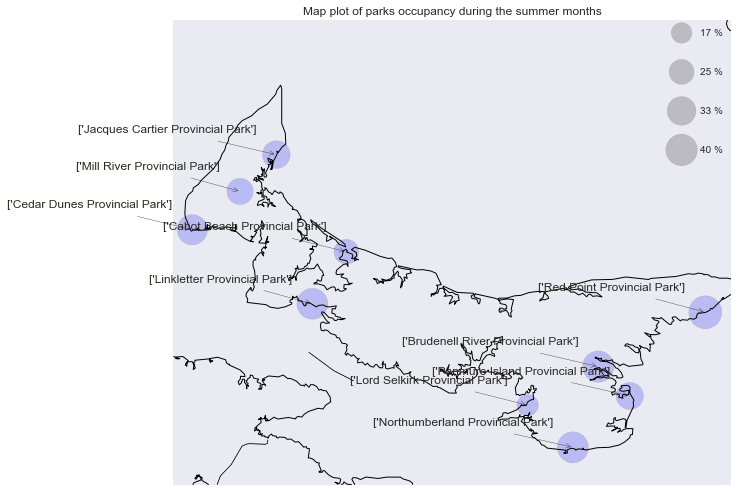

In [213]:
fig = plt.figure(figsize=(10, 20))
m = Basemap(resolution='h',
            projection='stere',
            lat_0=46.360506, lon_0=-63.361178,
            llcrnrlon=-64.45, llcrnrlat= 45.85, urcrnrlon=-62., urcrnrlat=47.25)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
m.scatter(tmp2[['LONGITUDE']].values, tmp2[['LATITUDE']].values, latlon=True,
          s=25*tmp2[['% OCCUPANCY']].values,
          cmap='viridis', alpha=0.2)
for a in [17*25, 25*25, 33*25, 40*25]:
    plt.scatter([], [], c='k', alpha=0.2, s=a,
                label=str(a/25) + ' %')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=3, loc='upper right');
x, y = m(tmp2[['LONGITUDE']].values, tmp2[['LATITUDE']].values)
labels = tmp2[['PROVINCIAL_PARK_NAME']].values
for label, x, y in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.005),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.title('Map plot of parks occupancy during the summer months')

## Conclusion
Overall we observed a decrease in sites sand parks attendancy from year 2013 to 2015, and especially in 2014 during which most parks and sites recorded their biggest loss in traffic. From our analysis, this could be explained by the fact that summer temperatures in 2014 were generaly lower by a few margins. So parks and sites attendandy is highly dependant on the weather. The 4 most popular parks over the recent years are: Northumberland, Cedar, Brudenell and Red Point; these 4 account for more than 50% of parks attendancy overall. We also found that Basin Head, Beaconsflied and Eptek are the most visted sites in PEI.